# Feel Free to train and test your own Model!

  - Step 1: Specify in exampleModel.json the parameters you want. I recommend only changing the commented parameters to ensure that the json file does not break.


## Config Files follow this format:
	 dataset_dir :  Tomato-Merged # The current dataset being used. Tomato-Merged is our unioned dataset, PlantVillage-Tomato is just PlantVillage
	 checkpoint_filepath :  MobileVITNoCLAHE # The model Name
	 add_dense :  True # Feel Free to change this. This takes off the dense layer, which was always kept on as a parameter in our data.
	 img_height :  224
	 img_width :  224
	 batch_size :  16
	 epochs :  100 # Change this for shorter or longer train times
	 n_classes :  10
	 seed :  42
	 fig_format :  .png
	 data_augmentations
		 TRAIN_AUG :  True # If this is true Augmentation is ON
		 VALID_AUG :  False
		 TEST_AUG :  False
		 isVIT :  True # This is only true if you are running the MobileVIT vision transformer. Changes images from 224x224 to 256x256
		 applyCLAHE :  False # If this is true, CLAHE pre-processing is ON
		 rotation_range :  20
		 horizontal_flip :  True
		 width_shift_range :  0.2
		 height_shift_range :  0.2
		 shear_range :  0.2
	 model_configuration
		 backbone_name :  mobilevitsmall # Name of the model architecture we are using
		 optimizer :  adam
	 learning_rates
		 initial_lr :  1e-05 # change this if you want a lower or higher initial learning rate.
		 max_lr :  0.0001
	 version :  1.0.0

Everything that is commented is the only parameters we changed to ensure our parent paper could remain the control.
Load the following libraries:

In [4]:
from train import runTrain
from evaluate import runEval
from IPython.display import Image, display

  - Step 2: Running the following will give you train and validation loss, validation accuracy as well as learning rate adjustments per epoch:

#### WARNING. THIS IS EXTREMELY COMPUTATIONALLY EXPENSIVE. ONLY RUN IF YOU HAVE GPU ACCELERATION
The model is already trained, so all you have to do is runEval("example.json") if you dont want to run it. That is the next code block. This is trained on PlantVillage.

	 dataset_dir :  PlantVillage-Tomato
	 checkpoint_filepath :  ExampleModel
	 add_dense :  False
	 img_height :  224
	 img_width :  224
	 batch_size :  16
	 epochs :  8
	 n_classes :  10
	 seed :  42
	 fig_format :  .png
	 data_augmentations
		 TRAIN_AUG :  False
		 VALID_AUG :  False
		 TEST_AUG :  False
		 isVIT :  False
		 applyCLAHE :  False
		 rotation_range :  20
		 horizontal_flip :  True
		 width_shift_range :  0.2
		 height_shift_range :  0.2
		 shear_range :  0.2
	 model_configuration
		 backbone_name :  mobilenetv2
		 optimizer :  adam
	 learning_rates
		 initial_lr :  1e-05
		 max_lr :  0.0001
	 version :  1.0.0
[INFO] No Augmentation is applied on training data generator
Found 10896 validated image filenames belonging to 10 classes.
[INFO] No Augmentation is applied on validation data generator
Found 3632 validated image filenames belonging to 10 classes.
[INFO] No Augmentation is applied on Test data generator
Found 3632 validated image filenames belonging to 10 classes.
[

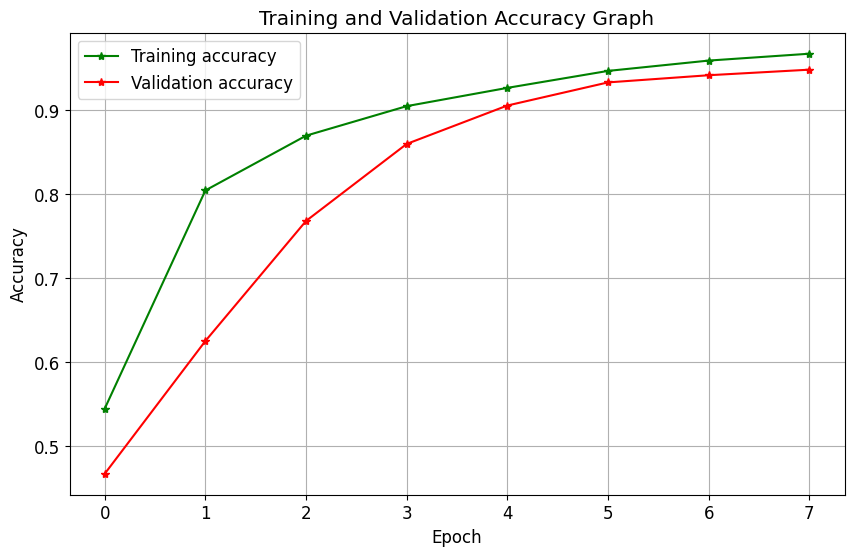

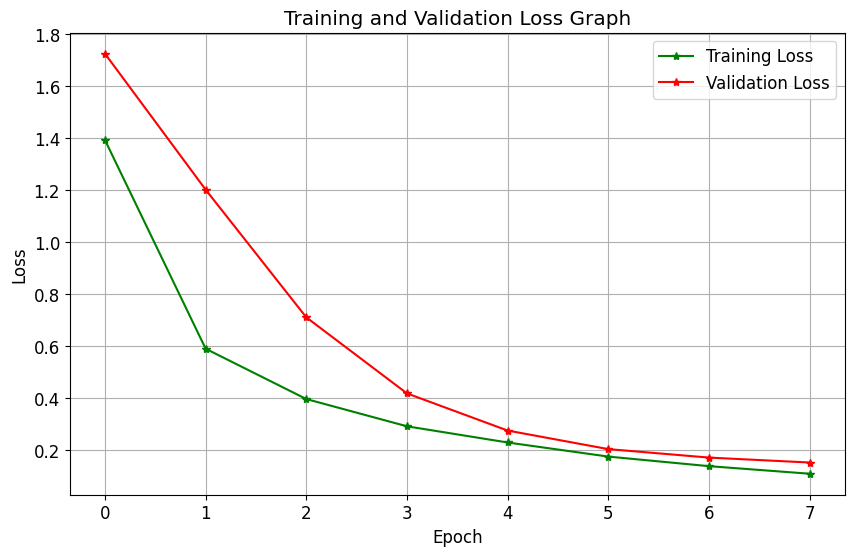

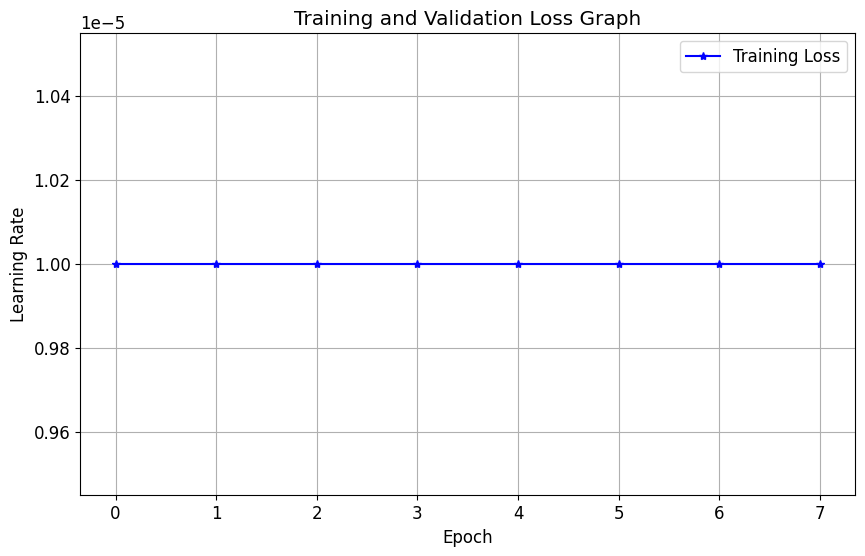

In [2]:
runTrain("example.json")

#### Just run this file if you want to see what example models would look like:

This will also auto print the confusion matrix.

	 dataset_dir :  PlantVillage-Tomato
	 checkpoint_filepath :  ExampleModel
	 add_dense :  False
	 img_height :  224
	 img_width :  224
	 batch_size :  16
	 epochs :  8
	 n_classes :  10
	 seed :  42
	 fig_format :  .png
	 data_augmentations
		 TRAIN_AUG :  False
		 VALID_AUG :  False
		 TEST_AUG :  False
		 isVIT :  False
		 applyCLAHE :  False
		 rotation_range :  20
		 horizontal_flip :  True
		 width_shift_range :  0.2
		 height_shift_range :  0.2
		 shear_range :  0.2
	 model_configuration
		 backbone_name :  mobilenetv2
		 optimizer :  adam
	 learning_rates
		 initial_lr :  1e-05
		 max_lr :  0.0001
	 version :  1.0.0
[INFO] No Augmentation is applied on training data generator
Found 10896 validated image filenames belonging to 10 classes.
[INFO] No Augmentation is applied on validation data generator
Found 3632 validated image filenames belonging to 10 classes.
[INFO] No Augmentation is applied on Test data generator
Found 3632 validated image filenames belonging to 10 classes.
[

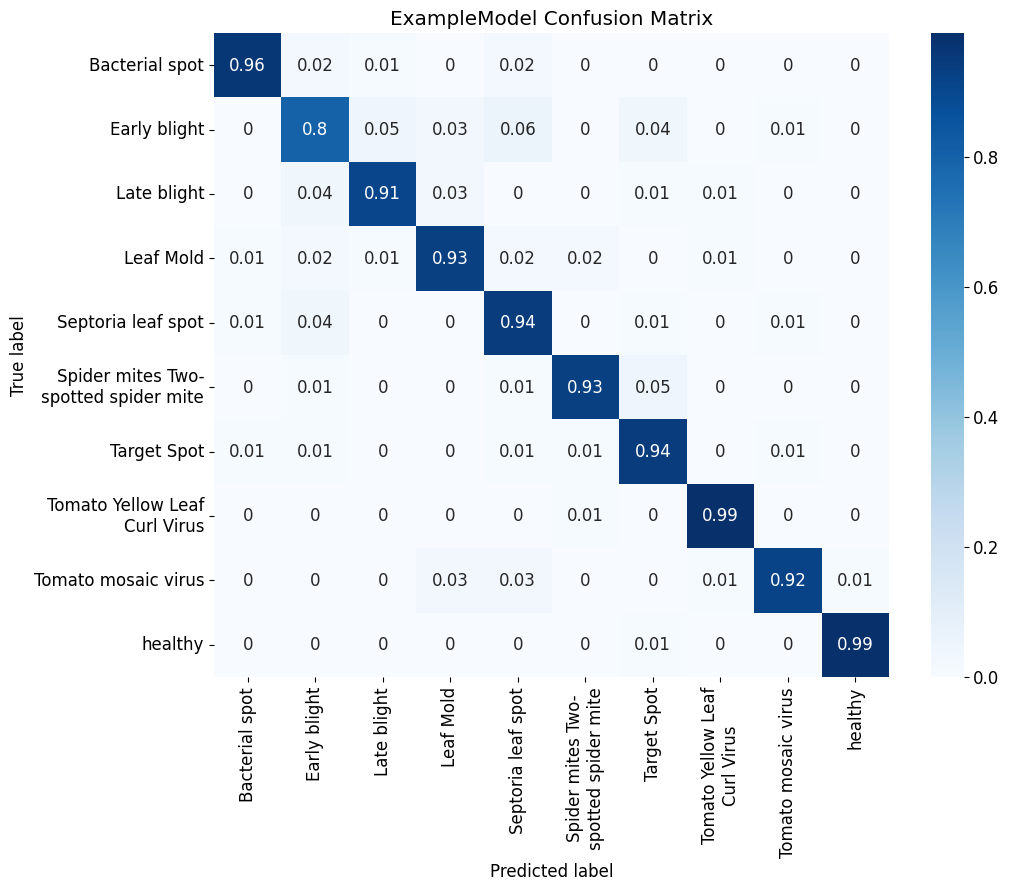

In [5]:
runEval("example.json")

You can view the AUC ROC curves for every class with the following code:

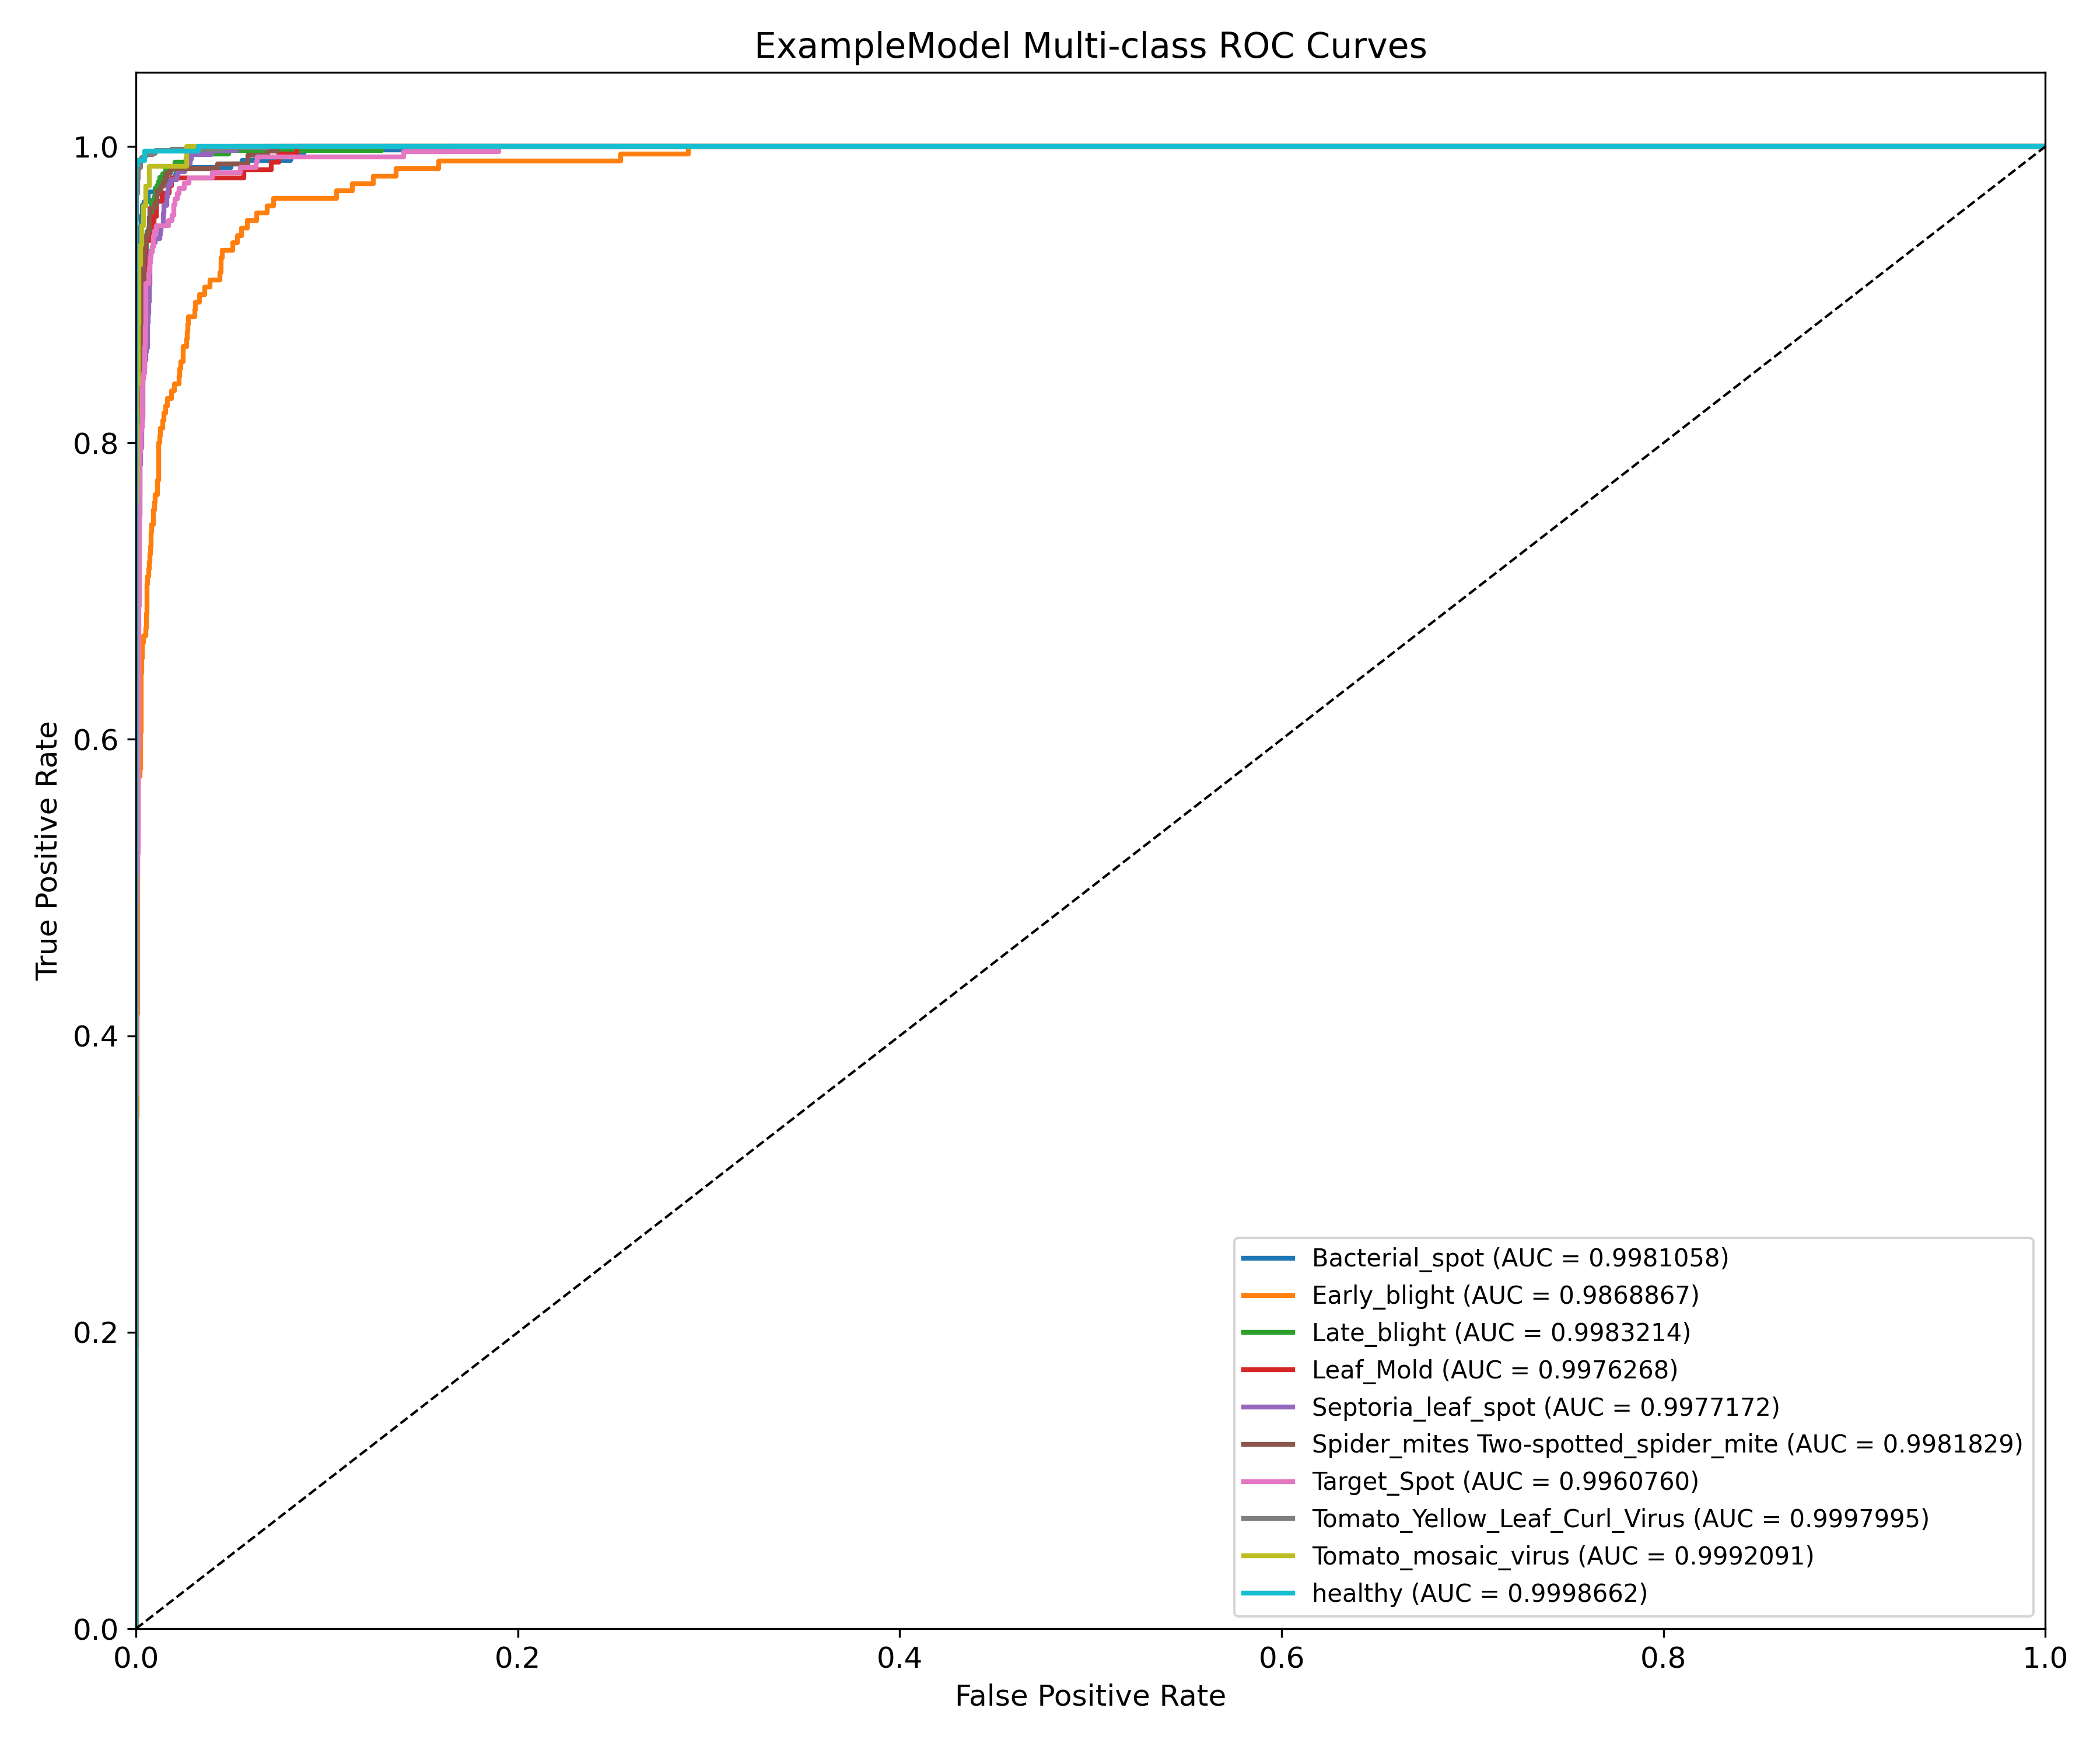

In [6]:
display(Image("ExampleModel/graphs/roc_curves.png",height=1000,width=800))


To view the classification report:

In [7]:
!type ExampleModel\classification_report.txt


_____________________CLASSIFICATION REPORT____________________________

Classification Accuracy: 0.9476872246696035
Mean Squared Error     : 0.47494493392070486
______________________________________________________________________
              precision    recall  f1-score   support

           0     0.9760    0.9554    0.9656       426
           1     0.7767    0.8000    0.7882       200
           2     0.9562    0.9136    0.9344       382
           3     0.8894    0.9316    0.9100       190
           4     0.9194    0.9350    0.9272       354
           5     0.9538    0.9254    0.9394       335
           6     0.8833    0.9431    0.9122       281
           7     0.9944    0.9888    0.9916      1071
           8     0.8961    0.9200    0.9079        75
           9     0.9906    0.9906    0.9906       318

    accuracy                         0.9477      3632
   macro avg     0.9236    0.9303    0.9267      3632
weighted avg     0.9487    0.9477    0.9480      3632


Hopefully now, each .ipynb file will make more sense.